# Music Genre Classification - Genre Classification

l implement a music genre classifier using Tensorflow. The classifier is trained on MFCC features extracted from the music Marsyas dataset. While building the network, I also introduce a few fundamental deep learning concepts such as binary/multicalss classification, rectified linear units, batching, and overfitting.

* load data
* split data into train and test sets
* build the neural network
* compile the network
* train the network

In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras as keras
from sklearn.model_selection import train_test_split
%config Completer.use_jedi = False

In [2]:
DATASET_PATH = ".\\data\\data_10.json"

In [3]:
def load_data(dataset_path):
    with open(dataset_path, "r") as fp:
        data = json.load(fp)

    # convert lists into NumPy arrays
    inputs = np.array(data["mfcc"])
    targets = np.array(data["labels"])
    
    return inputs, targets

In [11]:
def plot_training_history(history):
    
    # create new figure object with 2 subplots
    fig, ax = plt.subplots(2, figsize=(8,6), dpi=150)
    
    # 1. create accuracy subplot
    ax[0].plot(history.history["accuracy"], label="train accuracy")
    ax[0].plot(history.history["val_accuracy"], label="test accuracy")
    ax[0].set_ylabel("Accuracy")
    ax[0].legend(loc="lower right")
    ax[0].set_title("Accuracy Evaluation")
    
    # 2. create error subplot
    ax[1].plot(history.history["loss"], label="train error")
    ax[1].plot(history.history["val_loss"], label="test error")
    ax[1].set_xlabel("Epoch")
    ax[1].set_ylabel("Error")
    ax[1].legend(loc="upper right")
    ax[1].set_title("Error Evaluation")    
    
    # display the two plots
    plt.tight_layout()
    plt.show()

In [5]:
# load data
inputs, targets = load_data(DATASET_PATH)

In [45]:
# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(inputs, 
                                                    targets, 
                                                    test_size=0.30, 
                                                    random_state=101)

X_train.shape

(6983, 130, 13)

In [7]:
# build the network architecture
model = keras.Sequential([
    # input layer
    keras.layers.Flatten(input_shape=(inputs.shape[1], inputs.shape[2])),
    
    # 1st hidden layer
    keras.layers.Dense(512, activation="relu"),
    
    # 2nd hidden layer
    keras.layers.Dense(256, activation="relu"),
    
    # 3rd hidden layer
    keras.layers.Dense(64, activation="relu"), 
    
    # output layer
    keras.layers.Dense(10, activation="softmax")
])

In [8]:
# compile network
custom_optimizer = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=custom_optimizer,
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"]);
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 1690)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               865792    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 1,014,218
Trainable params: 1,014,218
Non-trainable params: 0
_________________________________________________________________


In [9]:
# train network
history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test),
                    epochs=64,
                    batch_size=32)

Epoch 1/64
219/219 [==============================] - 3s 11ms/step - loss: 13.4005 - accuracy: 0.2567 - val_loss: 2.8865 - val_accuracy: 0.2967
Epoch 2/64
219/219 [==============================] - 2s 8ms/step - loss: 2.2000 - accuracy: 0.3265 - val_loss: 2.1084 - val_accuracy: 0.3137
Epoch 3/64
219/219 [==============================] - 2s 7ms/step - loss: 1.7948 - accuracy: 0.3796 - val_loss: 2.0889 - val_accuracy: 0.3415
Epoch 4/64
219/219 [==============================] - 1s 7ms/step - loss: 1.6506 - accuracy: 0.4328 - val_loss: 2.0665 - val_accuracy: 0.3772
Epoch 5/64
219/219 [==============================] - 1s 6ms/step - loss: 1.5410 - accuracy: 0.4683 - val_loss: 1.9904 - val_accuracy: 0.3826
Epoch 6/64
219/219 [==============================] - 1s 6ms/step - loss: 1.4325 - accuracy: 0.4952 - val_loss: 2.0025 - val_accuracy: 0.3635
Epoch 7/64
219/219 [==============================] - 1s 6ms/step - loss: 1.3751 - accuracy: 0.5245 - val_loss: 2.0207 - val_accuracy: 0.4230
Epoc

219/219 [==============================] - 1s 6ms/step - loss: 0.0945 - accuracy: 0.9656 - val_loss: 2.9190 - val_accuracy: 0.5804
Epoch 59/64
219/219 [==============================] - 1s 6ms/step - loss: 0.3009 - accuracy: 0.9025 - val_loss: 2.6348 - val_accuracy: 0.6031
Epoch 60/64
219/219 [==============================] - 1s 6ms/step - loss: 0.0915 - accuracy: 0.9673 - val_loss: 2.8708 - val_accuracy: 0.5890
Epoch 61/64
219/219 [==============================] - 1s 6ms/step - loss: 0.1660 - accuracy: 0.9450 - val_loss: 2.7776 - val_accuracy: 0.5987
Epoch 62/64
219/219 [==============================] - 1s 6ms/step - loss: 0.0971 - accuracy: 0.9690 - val_loss: 2.7666 - val_accuracy: 0.5974
Epoch 63/64
219/219 [==============================] - 1s 5ms/step - loss: 0.0619 - accuracy: 0.9791 - val_loss: 2.8131 - val_accuracy: 0.6004
Epoch 64/64
219/219 [==============================] - 1s 6ms/step - loss: 0.0735 - accuracy: 0.9776 - val_loss: 2.8883 - val_accuracy: 0.5961


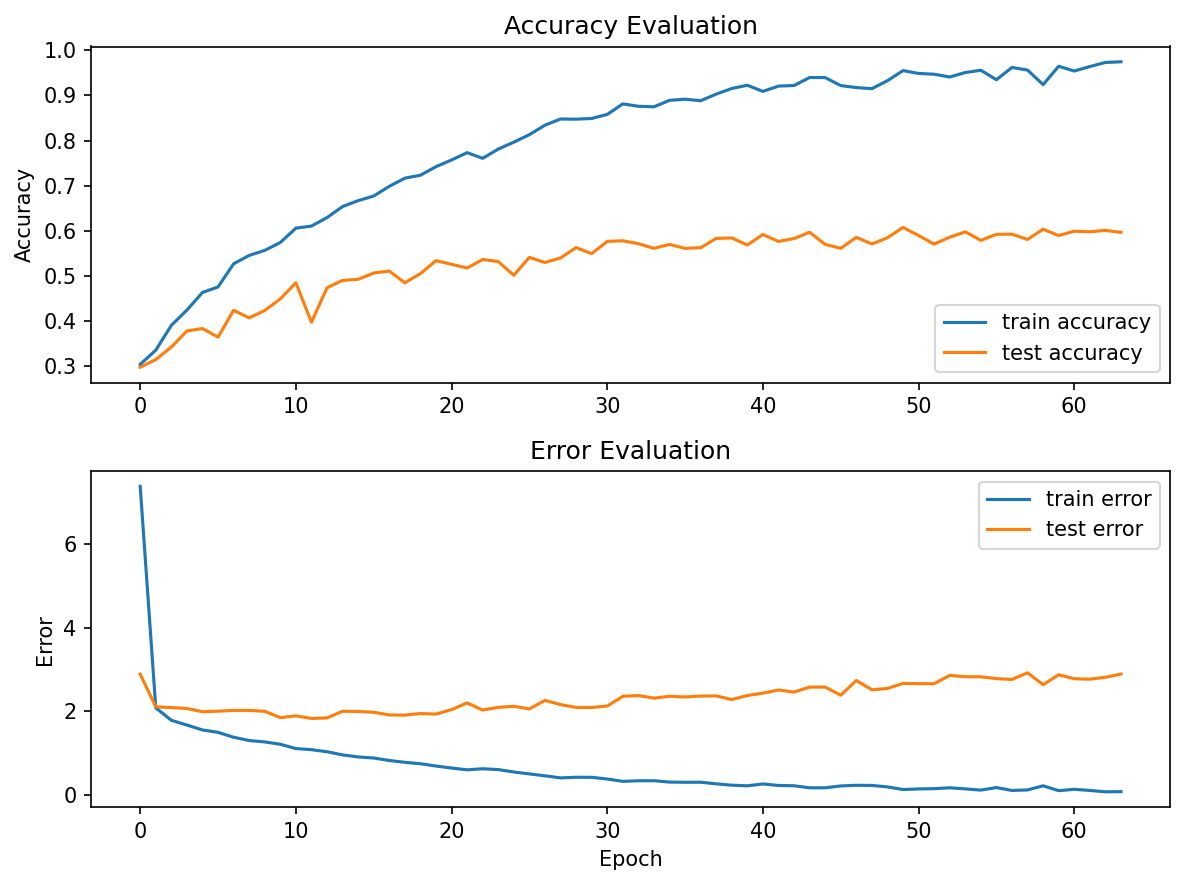

In [12]:
# plot the training progress
plot_training_history(history)

**Handle Overfitting**

* Random Dropout
* L2 Regularization

In [14]:
# build the network architecture
model2 = keras.Sequential([
    # input layer
    keras.layers.Flatten(input_shape=(inputs.shape[1], inputs.shape[2])),
    
    # 1st hidden layer
    keras.layers.Dense(512, activation="relu", kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),
    
    # 2nd hidden layer
    keras.layers.Dense(256, activation="relu", kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),
    
    # 3rd hidden layer
    keras.layers.Dense(64, activation="relu", kernel_regularizer=keras.regularizers.l2(0.001)), 
    keras.layers.Dropout(0.3),
    
    # output layer
    keras.layers.Dense(10, activation="softmax")
])

In [15]:
# compile network
model2.compile(optimizer=custom_optimizer,
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"]);
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 1690)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               865792    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                16448     
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)               

In [17]:
# train network
history2 = model2.fit(X_train, y_train, 
                    validation_data=(X_test, y_test),
                    epochs=128,
                    batch_size=32)

Epoch 1/128
219/219 [==============================] - 5s 24ms/step - loss: 2.2135 - accuracy: 0.3060 - val_loss: 2.2559 - val_accuracy: 0.3228
Epoch 2/128
219/219 [==============================] - 5s 24ms/step - loss: 2.1759 - accuracy: 0.3183 - val_loss: 2.1978 - val_accuracy: 0.3298
Epoch 3/128
219/219 [==============================] - 4s 16ms/step - loss: 2.1436 - accuracy: 0.3350 - val_loss: 2.1408 - val_accuracy: 0.3542
Epoch 4/128
219/219 [==============================] - 5s 21ms/step - loss: 2.1035 - accuracy: 0.3501 - val_loss: 2.1420 - val_accuracy: 0.3465
Epoch 5/128
219/219 [==============================] - 4s 17ms/step - loss: 2.0636 - accuracy: 0.3696 - val_loss: 2.1243 - val_accuracy: 0.3652
Epoch 6/128
219/219 [==============================] - 5s 24ms/step - loss: 2.0253 - accuracy: 0.3874 - val_loss: 2.0413 - val_accuracy: 0.4133
Epoch 7/128
219/219 [==============================] - 4s 20ms/step - loss: 1.9886 - accuracy: 0.4106 - val_loss: 2.0264 - val_accuracy:

219/219 [==============================] - 3s 16ms/step - loss: 0.9380 - accuracy: 0.7450 - val_loss: 1.6472 - val_accuracy: 0.5931
Epoch 58/128
219/219 [==============================] - 4s 16ms/step - loss: 0.9065 - accuracy: 0.7501 - val_loss: 1.6718 - val_accuracy: 0.5981
Epoch 59/128
219/219 [==============================] - 3s 15ms/step - loss: 0.8899 - accuracy: 0.7568 - val_loss: 1.5905 - val_accuracy: 0.6047
Epoch 60/128
219/219 [==============================] - 3s 15ms/step - loss: 0.8802 - accuracy: 0.7639 - val_loss: 1.6870 - val_accuracy: 0.6064
Epoch 61/128
219/219 [==============================] - 4s 16ms/step - loss: 0.8847 - accuracy: 0.7537 - val_loss: 1.6288 - val_accuracy: 0.6004
Epoch 62/128
219/219 [==============================] - 4s 17ms/step - loss: 0.8722 - accuracy: 0.7604 - val_loss: 1.6344 - val_accuracy: 0.5957
Epoch 63/128
219/219 [==============================] - 4s 19ms/step - loss: 0.8762 - accuracy: 0.7640 - val_loss: 1.6601 - val_accuracy: 0.601

219/219 [==============================] - 4s 16ms/step - loss: 0.6129 - accuracy: 0.8492 - val_loss: 1.7403 - val_accuracy: 0.6171
Epoch 114/128
219/219 [==============================] - 3s 16ms/step - loss: 0.6111 - accuracy: 0.8511 - val_loss: 1.8245 - val_accuracy: 0.6164
Epoch 115/128
219/219 [==============================] - 3s 15ms/step - loss: 0.6199 - accuracy: 0.8496 - val_loss: 1.7977 - val_accuracy: 0.6064
Epoch 116/128
219/219 [==============================] - 3s 15ms/step - loss: 0.6150 - accuracy: 0.8456 - val_loss: 1.7737 - val_accuracy: 0.5957
Epoch 117/128
219/219 [==============================] - 4s 17ms/step - loss: 0.5977 - accuracy: 0.8541 - val_loss: 1.7836 - val_accuracy: 0.6148
Epoch 118/128
219/219 [==============================] - 5s 23ms/step - loss: 0.6177 - accuracy: 0.8475 - val_loss: 1.8062 - val_accuracy: 0.6027
Epoch 119/128
219/219 [==============================] - 4s 20ms/step - loss: 0.6100 - accuracy: 0.8496 - val_loss: 1.7565 - val_accuracy:

In [41]:
# train network
early_stopping = keras.callbacks.EarlyStopping(monitor='loss', patience=5)
history_test = model2.fit(X_train, y_train, 
                    validation_data=(X_test, y_test),
                    epochs=128,
#                     callbacks=[early_stopping], # added early stopping to prevent overfitting as well
                    batch_size=128)

Epoch 1/128
63/63 [==============================] - 2s 29ms/step - loss: 0.4361 - accuracy: 0.9078 - val_loss: 1.7073 - val_accuracy: 0.6353
Epoch 2/128
63/63 [==============================] - 1s 20ms/step - loss: 0.4649 - accuracy: 0.9008 - val_loss: 1.7065 - val_accuracy: 0.6363
Epoch 3/128
63/63 [==============================] - 1s 21ms/step - loss: 0.4425 - accuracy: 0.9066 - val_loss: 1.6911 - val_accuracy: 0.6283
Epoch 4/128
63/63 [==============================] - 2s 26ms/step - loss: 0.4370 - accuracy: 0.9080 - val_loss: 1.7828 - val_accuracy: 0.6343
Epoch 5/128
63/63 [==============================] - 2s 25ms/step - loss: 0.4423 - accuracy: 0.9090 - val_loss: 1.7242 - val_accuracy: 0.6453
Epoch 6/128
63/63 [==============================] - 2s 24ms/step - loss: 0.4303 - accuracy: 0.9132 - val_loss: 1.7307 - val_accuracy: 0.6348
Epoch 7/128
63/63 [==============================] - 2s 25ms/step - loss: 0.4371 - accuracy: 0.9064 - val_loss: 1.7473 - val_accuracy: 0.6323
Epoch 

63/63 [==============================] - 1s 19ms/step - loss: 0.3815 - accuracy: 0.9229 - val_loss: 1.8282 - val_accuracy: 0.6298
Epoch 59/128
63/63 [==============================] - 1s 20ms/step - loss: 0.3712 - accuracy: 0.9303 - val_loss: 1.8364 - val_accuracy: 0.6283
Epoch 60/128
63/63 [==============================] - 1s 19ms/step - loss: 0.3890 - accuracy: 0.9229 - val_loss: 1.8324 - val_accuracy: 0.6303
Epoch 61/128
63/63 [==============================] - 1s 19ms/step - loss: 0.3747 - accuracy: 0.9274 - val_loss: 1.7719 - val_accuracy: 0.6423
Epoch 62/128
63/63 [==============================] - 1s 20ms/step - loss: 0.3766 - accuracy: 0.9271 - val_loss: 1.8464 - val_accuracy: 0.6333
Epoch 63/128
63/63 [==============================] - 1s 19ms/step - loss: 0.3731 - accuracy: 0.9298 - val_loss: 1.8483 - val_accuracy: 0.6247
Epoch 64/128
63/63 [==============================] - 1s 19ms/step - loss: 0.3650 - accuracy: 0.9313 - val_loss: 1.8451 - val_accuracy: 0.6288
Epoch 65/128

63/63 [==============================] - 1s 23ms/step - loss: 0.3255 - accuracy: 0.9439 - val_loss: 1.8713 - val_accuracy: 0.6423
Epoch 116/128
63/63 [==============================] - 1s 20ms/step - loss: 0.3424 - accuracy: 0.9368 - val_loss: 1.9240 - val_accuracy: 0.6413
Epoch 117/128
63/63 [==============================] - 1s 19ms/step - loss: 0.3342 - accuracy: 0.9381 - val_loss: 1.8405 - val_accuracy: 0.6378
Epoch 118/128
63/63 [==============================] - 1s 19ms/step - loss: 0.3379 - accuracy: 0.9390 - val_loss: 1.8678 - val_accuracy: 0.6338
Epoch 119/128
63/63 [==============================] - 2s 25ms/step - loss: 0.3401 - accuracy: 0.9387 - val_loss: 1.8764 - val_accuracy: 0.6318
Epoch 120/128
63/63 [==============================] - 1s 21ms/step - loss: 0.3374 - accuracy: 0.9395 - val_loss: 1.8200 - val_accuracy: 0.6453
Epoch 121/128
63/63 [==============================] - 2s 32ms/step - loss: 0.3266 - accuracy: 0.9439 - val_loss: 1.8798 - val_accuracy: 0.6378
Epoch 

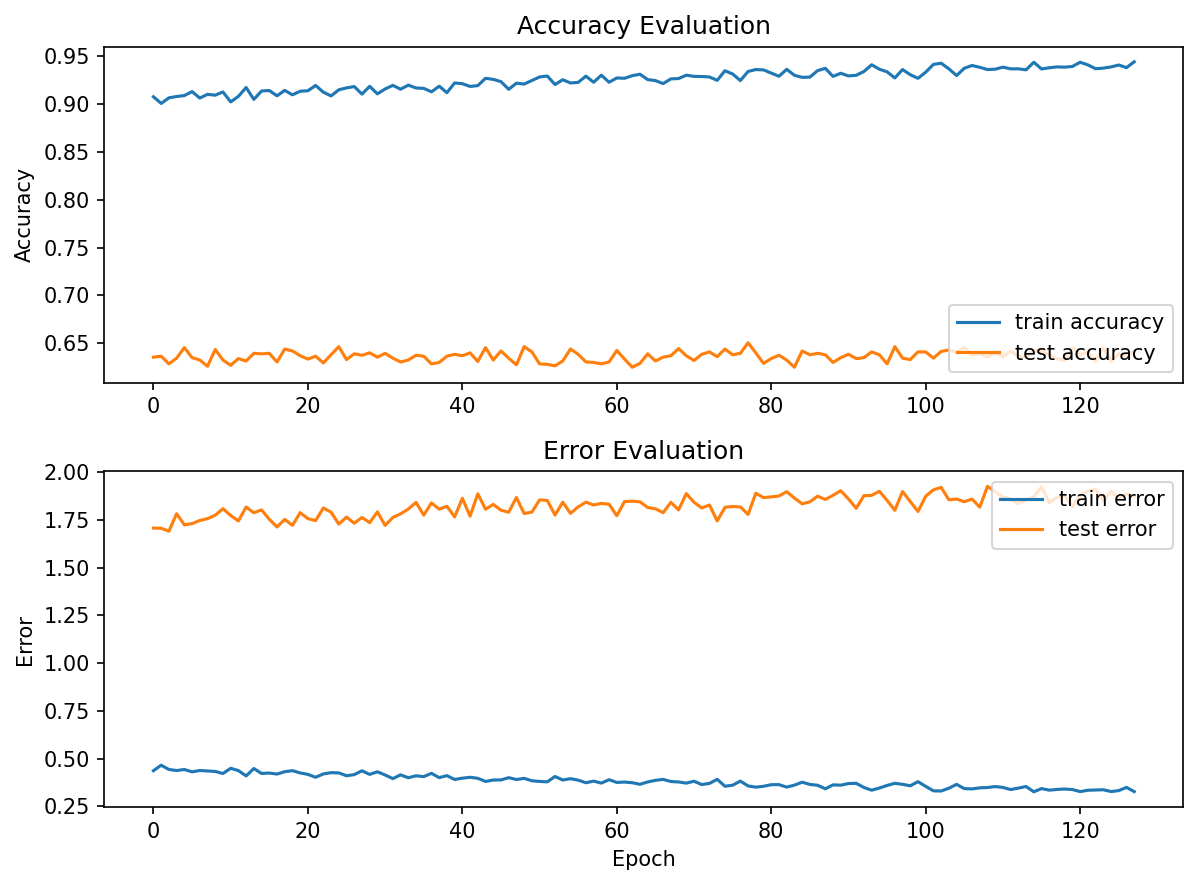

In [43]:
plot_training_history(history_test)

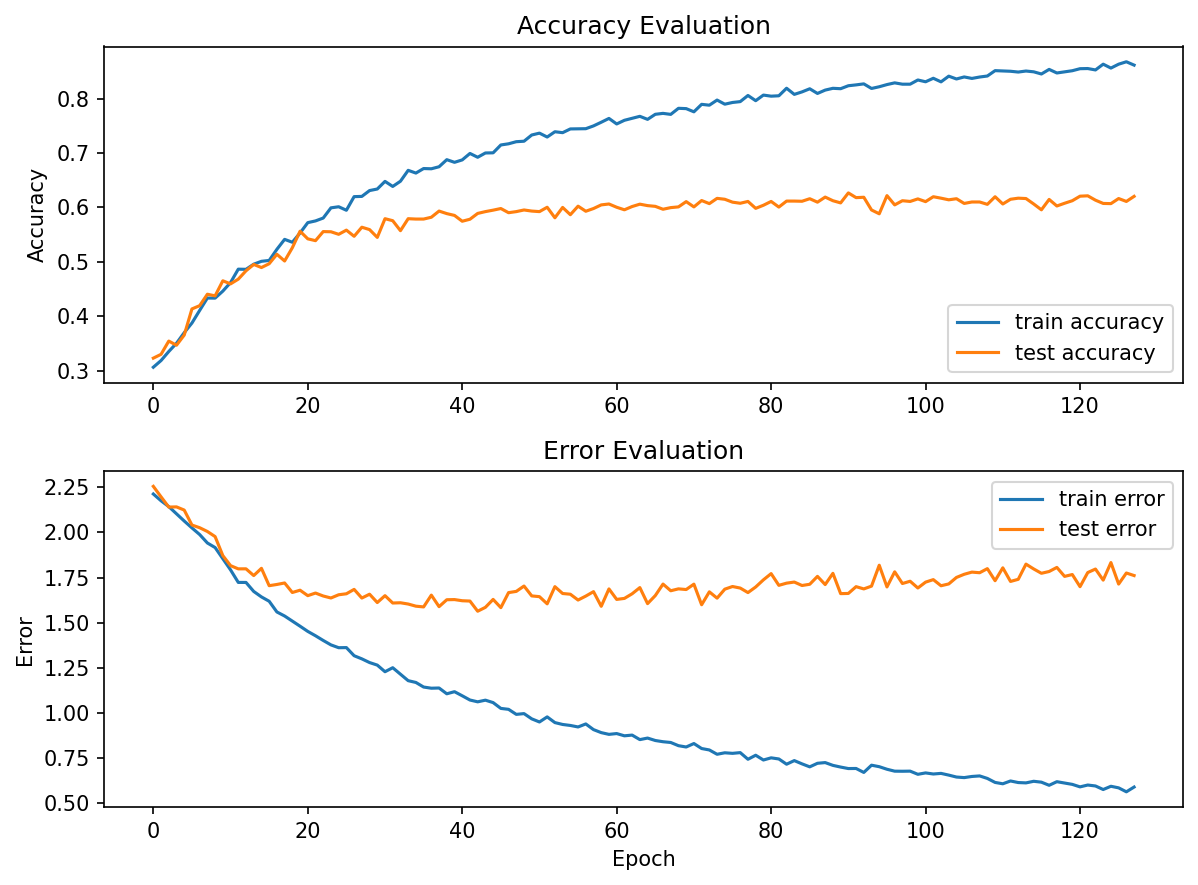

In [18]:
# plot the training progress
plot_training_history(history2)

**Optimization**

In [51]:
# input shape
input_shape = (inputs.shape[1], inputs.shape[2])
BATCH_SIZE = 64
EPOCHS = 64

# parameters

num_hidden_layers = [2, 3, 4, 5]
learning_rates = [0.01, 0.001, 0.0001]

# num_hidden_layers = [2]
# learning_rates = [0.01]

layer_widths = [512, 256, 128, 64, 32]
layer_widths_small = [256, 128, 64, 32, 16]
assign_widths = [0, 1]

# create test matrix
count = 0
results = []
for width_type in assign_widths:
    for alpha in learning_rates:
        for N in num_hidden_layers:
            
            # determine the width of each hidden layer
            width_by_layer = []
            if width_type == 0:
                for i in range(N):
                    width_by_layer.append(layer_widths[i])
            elif width_type == 1:
                for i in range(N):
                    width_by_layer.append(layer_widths_small[i])            
            print(count, alpha, N, width_by_layer)
            count += 1
            
            # model creation
            model_k = build_model(input_shape, width_by_layer)
            
            # compile network
            custom_optimizer = keras.optimizers.Adam(learning_rate=alpha)
            model_k.compile(optimizer=custom_optimizer,
                          loss="sparse_categorical_crossentropy",
                          metrics=["accuracy"]);
            model_k.summary()
            
            # train network
            early_stopping = keras.callbacks.EarlyStopping(monitor='loss', patience=5)
            history_k = model_k.fit(X_train, y_train, 
                                   validation_data=(X_test, y_test),
                                   epochs=EPOCHS,
                                   callbacks=[early_stopping],
                                   batch_size=BATCH_SIZE)
            results.append(history_k)

0 0.01 2 [512, 256]
Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_37 (Flatten)         (None, 1690)              0         
_________________________________________________________________
dense_161 (Dense)            (None, 512)               865792    
_________________________________________________________________
dropout_121 (Dropout)        (None, 512)               0         
_________________________________________________________________
dense_162 (Dense)            (None, 256)               131328    
_________________________________________________________________
dropout_122 (Dropout)        (None, 256)               0         
_________________________________________________________________
dense_163 (Dense)            (None, 10)                2570      
Total params: 999,690
Trainable params: 999,690
Non-trainable params: 0
___________________________

Epoch 23/64
110/110 [==============================] - 2s 18ms/step - loss: 2.6975 - accuracy: 0.1015 - val_loss: 2.7793 - val_accuracy: 0.0966
Epoch 24/64
110/110 [==============================] - 2s 18ms/step - loss: 2.7612 - accuracy: 0.1024 - val_loss: 2.6851 - val_accuracy: 0.0915
Epoch 25/64
110/110 [==============================] - 2s 18ms/step - loss: 2.6655 - accuracy: 0.1119 - val_loss: 2.6276 - val_accuracy: 0.0989
Epoch 26/64
110/110 [==============================] - 2s 19ms/step - loss: 2.6288 - accuracy: 0.1064 - val_loss: 2.6097 - val_accuracy: 0.0999
Epoch 27/64
110/110 [==============================] - 2s 19ms/step - loss: 2.6000 - accuracy: 0.0993 - val_loss: 2.5776 - val_accuracy: 0.1016
Epoch 28/64
110/110 [==============================] - 2s 19ms/step - loss: 2.5786 - accuracy: 0.0988 - val_loss: 2.5602 - val_accuracy: 0.0999
Epoch 29/64
110/110 [==============================] - 2s 19ms/step - loss: 2.5544 - accuracy: 0.0913 - val_loss: 2.5390 - val_accuracy:

110/110 [==============================] - 2s 18ms/step - loss: 2.4807 - accuracy: 0.0988 - val_loss: 2.4709 - val_accuracy: 0.0915
Epoch 27/64
110/110 [==============================] - 2s 18ms/step - loss: 2.4677 - accuracy: 0.1032 - val_loss: 2.4585 - val_accuracy: 0.0982
Epoch 28/64
110/110 [==============================] - 2s 17ms/step - loss: 2.4561 - accuracy: 0.1108 - val_loss: 2.4488 - val_accuracy: 0.0915
Epoch 29/64
110/110 [==============================] - 2s 19ms/step - loss: 2.4451 - accuracy: 0.1028 - val_loss: 2.4373 - val_accuracy: 0.1036
Epoch 30/64
110/110 [==============================] - 2s 19ms/step - loss: 2.4366 - accuracy: 0.0902 - val_loss: 2.4292 - val_accuracy: 0.0915
Epoch 31/64
110/110 [==============================] - 2s 17ms/step - loss: 2.4257 - accuracy: 0.1032 - val_loss: 2.4201 - val_accuracy: 0.0989
Epoch 32/64
110/110 [==============================] - 2s 19ms/step - loss: 2.4184 - accuracy: 0.0991 - val_loss: 2.4127 - val_accuracy: 0.0966
Epoc

110/110 [==============================] - 2s 19ms/step - loss: 2.4911 - accuracy: 0.1122 - val_loss: 2.4801 - val_accuracy: 0.0915
Epoch 23/64
110/110 [==============================] - 2s 17ms/step - loss: 2.4762 - accuracy: 0.0945 - val_loss: 2.4659 - val_accuracy: 0.1039
Epoch 24/64
110/110 [==============================] - 2s 17ms/step - loss: 2.4624 - accuracy: 0.0982 - val_loss: 2.4528 - val_accuracy: 0.0989
Epoch 25/64
110/110 [==============================] - 2s 20ms/step - loss: 2.4495 - accuracy: 0.0967 - val_loss: 2.4417 - val_accuracy: 0.0915
Epoch 26/64
110/110 [==============================] - 2s 18ms/step - loss: 2.4383 - accuracy: 0.0919 - val_loss: 2.4303 - val_accuracy: 0.0982
Epoch 27/64
110/110 [==============================] - 2s 17ms/step - loss: 2.4277 - accuracy: 0.0911 - val_loss: 2.4207 - val_accuracy: 0.0915
Epoch 28/64
110/110 [==============================] - 2s 17ms/step - loss: 2.4172 - accuracy: 0.1015 - val_loss: 2.4110 - val_accuracy: 0.0915
Epoc

Epoch 25/64
110/110 [==============================] - 2s 18ms/step - loss: 2.2193 - accuracy: 0.3713 - val_loss: 2.1682 - val_accuracy: 0.4136
Epoch 26/64
110/110 [==============================] - 2s 18ms/step - loss: 2.1999 - accuracy: 0.3652 - val_loss: 2.1325 - val_accuracy: 0.4103
Epoch 27/64
110/110 [==============================] - 2s 17ms/step - loss: 2.1631 - accuracy: 0.3827 - val_loss: 2.1036 - val_accuracy: 0.4297
Epoch 28/64
110/110 [==============================] - 2s 15ms/step - loss: 2.1827 - accuracy: 0.3575 - val_loss: 2.1338 - val_accuracy: 0.3789
Epoch 29/64
110/110 [==============================] - 2s 15ms/step - loss: 2.1901 - accuracy: 0.3567 - val_loss: 2.0640 - val_accuracy: 0.4210
Epoch 30/64
110/110 [==============================] - 2s 16ms/step - loss: 2.1514 - accuracy: 0.3641 - val_loss: 2.0118 - val_accuracy: 0.4337
Epoch 31/64
110/110 [==============================] - 2s 17ms/step - loss: 2.1351 - accuracy: 0.3550 - val_loss: 2.0657 - val_accuracy:

110/110 [==============================] - 2s 20ms/step - loss: 2.5823 - accuracy: 0.3715 - val_loss: 2.4909 - val_accuracy: 0.3789
Epoch 16/64
110/110 [==============================] - 2s 19ms/step - loss: 2.5429 - accuracy: 0.3512 - val_loss: 2.4026 - val_accuracy: 0.4093
Epoch 17/64
110/110 [==============================] - 2s 16ms/step - loss: 2.4716 - accuracy: 0.3666 - val_loss: 2.3272 - val_accuracy: 0.4130
Epoch 18/64
110/110 [==============================] - 2s 20ms/step - loss: 2.4250 - accuracy: 0.3900 - val_loss: 2.2837 - val_accuracy: 0.4223
Epoch 19/64
110/110 [==============================] - 2s 20ms/step - loss: 2.3567 - accuracy: 0.3903 - val_loss: 2.2452 - val_accuracy: 0.4487
Epoch 20/64
110/110 [==============================] - 2s 17ms/step - loss: 2.3578 - accuracy: 0.3852 - val_loss: 2.2540 - val_accuracy: 0.4069
Epoch 21/64
110/110 [==============================] - 2s 19ms/step - loss: 2.3295 - accuracy: 0.3866 - val_loss: 2.2267 - val_accuracy: 0.4364
Epoc

_________________________________________________________________
dense_190 (Dense)            (None, 10)                650       
Total params: 1,038,922
Trainable params: 1,038,922
Non-trainable params: 0
_________________________________________________________________
Epoch 1/64
110/110 [==============================] - 4s 24ms/step - loss: 29.0893 - accuracy: 0.1185 - val_loss: 3.4992 - val_accuracy: 0.2332
Epoch 2/64
110/110 [==============================] - 2s 22ms/step - loss: 3.7795 - accuracy: 0.1789 - val_loss: 3.3209 - val_accuracy: 0.3344
Epoch 3/64
110/110 [==============================] - 2s 21ms/step - loss: 3.4812 - accuracy: 0.2353 - val_loss: 3.2226 - val_accuracy: 0.3284
Epoch 4/64
110/110 [==============================] - 2s 20ms/step - loss: 3.4084 - accuracy: 0.2475 - val_loss: 3.1387 - val_accuracy: 0.3228
Epoch 5/64
110/110 [==============================] - 2s 18ms/step - loss: 3.3009 - accuracy: 0.2652 - val_loss: 3.0052 - val_accuracy: 0.3324
Epoch 6/64

110/110 [==============================] - 2s 19ms/step - loss: 1.7553 - accuracy: 0.4313 - val_loss: 1.8037 - val_accuracy: 0.4136
Epoch 56/64
110/110 [==============================] - 2s 22ms/step - loss: 1.7713 - accuracy: 0.4187 - val_loss: 1.7332 - val_accuracy: 0.4457
Epoch 57/64
110/110 [==============================] - 2s 18ms/step - loss: 1.7697 - accuracy: 0.4301 - val_loss: 1.7522 - val_accuracy: 0.4367
Epoch 58/64
110/110 [==============================] - 2s 17ms/step - loss: 1.7494 - accuracy: 0.4208 - val_loss: 1.7124 - val_accuracy: 0.4594
Epoch 59/64
110/110 [==============================] - 2s 17ms/step - loss: 1.7144 - accuracy: 0.4419 - val_loss: 1.7231 - val_accuracy: 0.4220
Epoch 60/64
110/110 [==============================] - 2s 18ms/step - loss: 1.7148 - accuracy: 0.4382 - val_loss: 1.7437 - val_accuracy: 0.4330
Epoch 61/64
110/110 [==============================] - 2s 18ms/step - loss: 1.7269 - accuracy: 0.4401 - val_loss: 1.7168 - val_accuracy: 0.4347
Epoc

110/110 [==============================] - 2s 18ms/step - loss: 2.2662 - accuracy: 0.3100 - val_loss: 2.2770 - val_accuracy: 0.2833
Epoch 35/64
110/110 [==============================] - 2s 20ms/step - loss: 2.2998 - accuracy: 0.2898 - val_loss: 2.2086 - val_accuracy: 0.3197
Epoch 36/64
110/110 [==============================] - 2s 18ms/step - loss: 2.2566 - accuracy: 0.2997 - val_loss: 2.2051 - val_accuracy: 0.3187
Epoch 37/64
110/110 [==============================] - 2s 18ms/step - loss: 2.2173 - accuracy: 0.3070 - val_loss: 2.1709 - val_accuracy: 0.3127
Epoch 38/64
110/110 [==============================] - 2s 18ms/step - loss: 2.1973 - accuracy: 0.3143 - val_loss: 2.1439 - val_accuracy: 0.3395
Epoch 39/64
110/110 [==============================] - 2s 19ms/step - loss: 2.2092 - accuracy: 0.2872 - val_loss: 2.1911 - val_accuracy: 0.3024
Epoch 40/64
110/110 [==============================] - 2s 17ms/step - loss: 2.1919 - accuracy: 0.2915 - val_loss: 2.1555 - val_accuracy: 0.3314
Epoc

Epoch 19/64
110/110 [==============================] - 2s 18ms/step - loss: 2.7286 - accuracy: 0.4232 - val_loss: 2.8742 - val_accuracy: 0.4250
Epoch 20/64
110/110 [==============================] - 3s 26ms/step - loss: 2.7199 - accuracy: 0.4289 - val_loss: 2.8566 - val_accuracy: 0.4220
Epoch 21/64
110/110 [==============================] - 2s 15ms/step - loss: 2.7085 - accuracy: 0.4268 - val_loss: 2.8741 - val_accuracy: 0.4153
Epoch 22/64
110/110 [==============================] - 2s 18ms/step - loss: 2.6874 - accuracy: 0.4361 - val_loss: 2.8494 - val_accuracy: 0.4277
Epoch 23/64
110/110 [==============================] - 3s 29ms/step - loss: 2.6516 - accuracy: 0.4330 - val_loss: 2.8366 - val_accuracy: 0.4313
Epoch 24/64
110/110 [==============================] - 2s 17ms/step - loss: 2.6108 - accuracy: 0.4532 - val_loss: 2.8381 - val_accuracy: 0.4390
Epoch 25/64
110/110 [==============================] - 2s 15ms/step - loss: 2.5804 - accuracy: 0.4605 - val_loss: 2.8133 - val_accuracy:

Epoch 2/64
110/110 [==============================] - 2s 18ms/step - loss: 11.9318 - accuracy: 0.2188 - val_loss: 4.2000 - val_accuracy: 0.3485
Epoch 3/64
110/110 [==============================] - 2s 17ms/step - loss: 7.3608 - accuracy: 0.2219 - val_loss: 3.5593 - val_accuracy: 0.3334
Epoch 4/64
110/110 [==============================] - 2s 16ms/step - loss: 5.0597 - accuracy: 0.2151 - val_loss: 3.4365 - val_accuracy: 0.3007
Epoch 5/64
110/110 [==============================] - 2s 16ms/step - loss: 4.2687 - accuracy: 0.2140 - val_loss: 3.3497 - val_accuracy: 0.3094
Epoch 6/64
110/110 [==============================] - 2s 18ms/step - loss: 3.8819 - accuracy: 0.2254 - val_loss: 3.2444 - val_accuracy: 0.3248
Epoch 7/64
110/110 [==============================] - 2s 19ms/step - loss: 3.6536 - accuracy: 0.2505 - val_loss: 3.1989 - val_accuracy: 0.3358
Epoch 8/64
110/110 [==============================] - 2s 17ms/step - loss: 3.5359 - accuracy: 0.2644 - val_loss: 3.1881 - val_accuracy: 0.335

Epoch 59/64
110/110 [==============================] - 2s 16ms/step - loss: 2.3058 - accuracy: 0.5180 - val_loss: 2.5153 - val_accuracy: 0.4577
Epoch 60/64
110/110 [==============================] - 2s 18ms/step - loss: 2.2779 - accuracy: 0.5296 - val_loss: 2.4874 - val_accuracy: 0.4728
Epoch 61/64
110/110 [==============================] - 2s 17ms/step - loss: 2.2398 - accuracy: 0.5305 - val_loss: 2.4822 - val_accuracy: 0.4674
Epoch 62/64
110/110 [==============================] - 2s 16ms/step - loss: 2.2464 - accuracy: 0.5239 - val_loss: 2.4837 - val_accuracy: 0.4688
Epoch 63/64
110/110 [==============================] - 2s 16ms/step - loss: 2.2144 - accuracy: 0.5294 - val_loss: 2.4720 - val_accuracy: 0.4741
Epoch 64/64
110/110 [==============================] - 2s 16ms/step - loss: 2.1902 - accuracy: 0.5463 - val_loss: 2.4702 - val_accuracy: 0.4738
10 0.0001 4 [512, 256, 128, 64]
Model: "sequential_47"
_________________________________________________________________
Layer (type)   

110/110 [==============================] - 2s 17ms/step - loss: 2.8737 - accuracy: 0.4085 - val_loss: 2.8011 - val_accuracy: 0.4380
Epoch 41/64
110/110 [==============================] - 2s 20ms/step - loss: 2.8480 - accuracy: 0.4058 - val_loss: 2.7917 - val_accuracy: 0.4404
Epoch 42/64
110/110 [==============================] - 4s 32ms/step - loss: 2.8404 - accuracy: 0.4119 - val_loss: 2.7761 - val_accuracy: 0.4487
Epoch 43/64
110/110 [==============================] - 2s 22ms/step - loss: 2.8106 - accuracy: 0.4085 - val_loss: 2.7651 - val_accuracy: 0.4444
Epoch 44/64
110/110 [==============================] - 2s 20ms/step - loss: 2.7595 - accuracy: 0.4258 - val_loss: 2.7453 - val_accuracy: 0.4521
Epoch 45/64
110/110 [==============================] - 2s 19ms/step - loss: 2.7723 - accuracy: 0.4167 - val_loss: 2.7560 - val_accuracy: 0.4333
Epoch 46/64
110/110 [==============================] - 2s 20ms/step - loss: 2.7482 - accuracy: 0.4286 - val_loss: 2.7369 - val_accuracy: 0.4427
Epoc

110/110 [==============================] - 3s 23ms/step - loss: 3.5332 - accuracy: 0.1895 - val_loss: 3.4500 - val_accuracy: 0.2392
Epoch 20/64
110/110 [==============================] - 2s 19ms/step - loss: 3.5328 - accuracy: 0.1922 - val_loss: 3.4390 - val_accuracy: 0.2660
Epoch 21/64
110/110 [==============================] - 2s 18ms/step - loss: 3.5111 - accuracy: 0.1973 - val_loss: 3.4124 - val_accuracy: 0.2776
Epoch 22/64
110/110 [==============================] - 2s 18ms/step - loss: 3.4894 - accuracy: 0.2071 - val_loss: 3.4133 - val_accuracy: 0.2720
Epoch 23/64
110/110 [==============================] - 2s 17ms/step - loss: 3.4737 - accuracy: 0.2131 - val_loss: 3.3857 - val_accuracy: 0.2830
Epoch 24/64
110/110 [==============================] - 2s 17ms/step - loss: 3.4594 - accuracy: 0.2153 - val_loss: 3.3632 - val_accuracy: 0.2843
Epoch 25/64
110/110 [==============================] - 2s 18ms/step - loss: 3.4475 - accuracy: 0.2145 - val_loss: 3.3500 - val_accuracy: 0.2853
Epoc

Epoch 4/64
110/110 [==============================] - 1s 6ms/step - loss: 3.5017 - accuracy: 0.0943 - val_loss: 3.3120 - val_accuracy: 0.0982
Epoch 5/64
110/110 [==============================] - 1s 6ms/step - loss: 3.2711 - accuracy: 0.1122 - val_loss: 3.1563 - val_accuracy: 0.1032
Epoch 6/64
110/110 [==============================] - 1s 6ms/step - loss: 3.1196 - accuracy: 0.1018 - val_loss: 3.0423 - val_accuracy: 0.0956
Epoch 7/64
110/110 [==============================] - 1s 6ms/step - loss: 3.0497 - accuracy: 0.1112 - val_loss: 2.9666 - val_accuracy: 0.0929
Epoch 8/64
110/110 [==============================] - 1s 6ms/step - loss: 2.9514 - accuracy: 0.1032 - val_loss: 2.8874 - val_accuracy: 0.0946
Epoch 9/64
110/110 [==============================] - 1s 6ms/step - loss: 2.8880 - accuracy: 0.1056 - val_loss: 2.8240 - val_accuracy: 0.0929
Epoch 10/64
110/110 [==============================] - 1s 6ms/step - loss: 2.8385 - accuracy: 0.1002 - val_loss: 2.8591 - val_accuracy: 0.0929
Epoch

110/110 [==============================] - 1s 6ms/step - loss: 2.3854 - accuracy: 0.1101 - val_loss: 2.3820 - val_accuracy: 0.0915
Epoch 34/64
110/110 [==============================] - ETA: 0s - loss: 2.3808 - accuracy: 0.10 - 1s 6ms/step - loss: 2.3808 - accuracy: 0.1082 - val_loss: 2.3773 - val_accuracy: 0.0966
Epoch 35/64
110/110 [==============================] - 1s 6ms/step - loss: 2.3859 - accuracy: 0.0930 - val_loss: 2.5487 - val_accuracy: 0.0915
Epoch 36/64
110/110 [==============================] - 1s 6ms/step - loss: 2.5852 - accuracy: 0.0952 - val_loss: 2.4552 - val_accuracy: 0.0915
Epoch 37/64
110/110 [==============================] - 1s 6ms/step - loss: 2.6820 - accuracy: 0.1023 - val_loss: 2.4833 - val_accuracy: 0.0915
Epoch 38/64
110/110 [==============================] - 1s 6ms/step - loss: 2.4804 - accuracy: 0.1058 - val_loss: 2.4546 - val_accuracy: 0.0915
Epoch 39/64
110/110 [==============================] - 1s 6ms/step - loss: 2.4466 - accuracy: 0.0976 - val_loss:

110/110 [==============================] - 1s 6ms/step - loss: 2.3543 - accuracy: 0.1018 - val_loss: 2.3534 - val_accuracy: 0.1016
Epoch 40/64
110/110 [==============================] - 1s 6ms/step - loss: 2.3540 - accuracy: 0.1028 - val_loss: 2.3487 - val_accuracy: 0.0966
Epoch 41/64
110/110 [==============================] - 1s 6ms/step - loss: 2.3493 - accuracy: 0.0920 - val_loss: 2.3469 - val_accuracy: 0.0915
Epoch 42/64
110/110 [==============================] - 1s 6ms/step - loss: 2.3955 - accuracy: 0.1033 - val_loss: 2.5021 - val_accuracy: 0.0915
Epoch 43/64
110/110 [==============================] - 1s 6ms/step - loss: 2.4775 - accuracy: 0.0955 - val_loss: 2.4180 - val_accuracy: 0.0915
Epoch 44/64
110/110 [==============================] - 1s 6ms/step - loss: 2.4431 - accuracy: 0.1038 - val_loss: 2.3861 - val_accuracy: 0.0966
Epoch 45/64
110/110 [==============================] - 1s 6ms/step - loss: 2.3846 - accuracy: 0.1017 - val_loss: 2.3830 - val_accuracy: 0.0915
Epoch 46/64

110/110 [==============================] - 1s 6ms/step - loss: 2.3413 - accuracy: 0.1067 - val_loss: 2.3395 - val_accuracy: 0.1016
Epoch 37/64
110/110 [==============================] - 1s 6ms/step - loss: 2.3383 - accuracy: 0.0962 - val_loss: 2.3361 - val_accuracy: 0.0915
Epoch 38/64
110/110 [==============================] - 1s 6ms/step - loss: 2.3348 - accuracy: 0.1011 - val_loss: 2.3336 - val_accuracy: 0.0915
Epoch 39/64
110/110 [==============================] - 1s 6ms/step - loss: 2.3330 - accuracy: 0.1065 - val_loss: 2.3321 - val_accuracy: 0.0989
Epoch 40/64
110/110 [==============================] - 1s 6ms/step - loss: 2.3303 - accuracy: 0.0919 - val_loss: 2.3294 - val_accuracy: 0.0966
Epoch 41/64
110/110 [==============================] - 1s 6ms/step - loss: 2.3284 - accuracy: 0.1006 - val_loss: 2.3269 - val_accuracy: 0.0966
Epoch 42/64
110/110 [==============================] - 1s 6ms/step - loss: 2.3268 - accuracy: 0.0996 - val_loss: 2.3256 - val_accuracy: 0.0966
Epoch 43/64

110/110 [==============================] - 1s 6ms/step - loss: 2.4773 - accuracy: 0.1848 - val_loss: 2.4334 - val_accuracy: 0.1744
Epoch 22/64
110/110 [==============================] - 1s 6ms/step - loss: 2.4655 - accuracy: 0.1734 - val_loss: 2.4521 - val_accuracy: 0.1651
Epoch 23/64
110/110 [==============================] - 1s 6ms/step - loss: 2.4501 - accuracy: 0.1736 - val_loss: 2.4149 - val_accuracy: 0.1741
Epoch 24/64
110/110 [==============================] - 1s 6ms/step - loss: 2.4282 - accuracy: 0.1799 - val_loss: 2.4053 - val_accuracy: 0.1777
Epoch 25/64
110/110 [==============================] - 1s 6ms/step - loss: 2.4131 - accuracy: 0.1790 - val_loss: 2.4055 - val_accuracy: 0.1681
Epoch 26/64
110/110 [==============================] - 1s 6ms/step - loss: 2.3884 - accuracy: 0.1781 - val_loss: 2.3941 - val_accuracy: 0.1741
Epoch 27/64
110/110 [==============================] - 1s 6ms/step - loss: 2.4080 - accuracy: 0.1849 - val_loss: 2.6442 - val_accuracy: 0.1737
Epoch 28/64

110/110 [==============================] - 1s 6ms/step - loss: 2.6355 - accuracy: 0.1721 - val_loss: 2.5876 - val_accuracy: 0.1924
Epoch 15/64
110/110 [==============================] - 1s 6ms/step - loss: 2.5955 - accuracy: 0.1859 - val_loss: 2.5484 - val_accuracy: 0.2031
Epoch 16/64
110/110 [==============================] - 1s 6ms/step - loss: 2.5836 - accuracy: 0.1832 - val_loss: 2.5747 - val_accuracy: 0.1858
Epoch 17/64
110/110 [==============================] - 1s 6ms/step - loss: 2.5772 - accuracy: 0.1786 - val_loss: 2.6172 - val_accuracy: 0.1985
Epoch 18/64
110/110 [==============================] - 1s 6ms/step - loss: 2.5807 - accuracy: 0.1832 - val_loss: 2.5150 - val_accuracy: 0.1908
Epoch 19/64
110/110 [==============================] - 1s 6ms/step - loss: 2.5695 - accuracy: 0.1764 - val_loss: 2.5066 - val_accuracy: 0.1928
Epoch 20/64
110/110 [==============================] - 1s 6ms/step - loss: 2.5161 - accuracy: 0.1934 - val_loss: 2.5257 - val_accuracy: 0.1975
Epoch 21/64

Epoch 1/64
110/110 [==============================] - 1s 8ms/step - loss: 22.6635 - accuracy: 0.1146 - val_loss: 2.9888 - val_accuracy: 0.1423
Epoch 2/64
110/110 [==============================] - 1s 6ms/step - loss: 3.0508 - accuracy: 0.1312 - val_loss: 2.9256 - val_accuracy: 0.1918
Epoch 3/64
110/110 [==============================] - 1s 6ms/step - loss: 2.9840 - accuracy: 0.1405 - val_loss: 2.8844 - val_accuracy: 0.1821
Epoch 4/64
110/110 [==============================] - 1s 6ms/step - loss: 2.9417 - accuracy: 0.1496 - val_loss: 2.8424 - val_accuracy: 0.1764
Epoch 5/64
110/110 [==============================] - 1s 6ms/step - loss: 2.9088 - accuracy: 0.1537 - val_loss: 2.7976 - val_accuracy: 0.1858
Epoch 6/64
110/110 [==============================] - 1s 6ms/step - loss: 2.8861 - accuracy: 0.1507 - val_loss: 2.8113 - val_accuracy: 0.1697
Epoch 7/64
110/110 [==============================] - 1s 6ms/step - loss: 2.8901 - accuracy: 0.1601 - val_loss: 2.7427 - val_accuracy: 0.1771
Epoch

110/110 [==============================] - 1s 6ms/step - loss: 1.9181 - accuracy: 0.3355 - val_loss: 1.9121 - val_accuracy: 0.3652
Epoch 59/64
110/110 [==============================] - 1s 6ms/step - loss: 1.9415 - accuracy: 0.3322 - val_loss: 1.9200 - val_accuracy: 0.3485
Epoch 60/64
110/110 [==============================] - 1s 7ms/step - loss: 1.9037 - accuracy: 0.3400 - val_loss: 1.8750 - val_accuracy: 0.3401
Epoch 61/64
110/110 [==============================] - 1s 7ms/step - loss: 1.9091 - accuracy: 0.3349 - val_loss: 1.8545 - val_accuracy: 0.3445
Epoch 62/64
110/110 [==============================] - 1s 7ms/step - loss: 1.8651 - accuracy: 0.3438 - val_loss: 1.9212 - val_accuracy: 0.3211
Epoch 63/64
110/110 [==============================] - 1s 7ms/step - loss: 1.8903 - accuracy: 0.3305 - val_loss: 1.9229 - val_accuracy: 0.3291
Epoch 64/64
110/110 [==============================] - 1s 6ms/step - loss: 1.8618 - accuracy: 0.3487 - val_loss: 1.8845 - val_accuracy: 0.3291
19 0.001 5 

110/110 [==============================] - 1s 7ms/step - loss: 2.2962 - accuracy: 0.1945 - val_loss: 2.3445 - val_accuracy: 0.2028
Epoch 38/64
110/110 [==============================] - 1s 7ms/step - loss: 2.2784 - accuracy: 0.2079 - val_loss: 2.3265 - val_accuracy: 0.2005
Epoch 39/64
110/110 [==============================] - 1s 7ms/step - loss: 2.3086 - accuracy: 0.1888 - val_loss: 2.2844 - val_accuracy: 0.1881
Epoch 40/64
110/110 [==============================] - 1s 7ms/step - loss: 2.2866 - accuracy: 0.1996 - val_loss: 2.2657 - val_accuracy: 0.2105
Epoch 41/64
110/110 [==============================] - 1s 7ms/step - loss: 2.2759 - accuracy: 0.1954 - val_loss: 2.2455 - val_accuracy: 0.2072
Epoch 42/64
110/110 [==============================] - 1s 6ms/step - loss: 2.2435 - accuracy: 0.2026 - val_loss: 2.2549 - val_accuracy: 0.1914
Epoch 43/64
110/110 [==============================] - 1s 7ms/step - loss: 2.2356 - accuracy: 0.2028 - val_loss: 2.2566 - val_accuracy: 0.2041
Epoch 44/64

110/110 [==============================] - 1s 6ms/step - loss: 2.4534 - accuracy: 0.3250 - val_loss: 2.5092 - val_accuracy: 0.3471
Epoch 23/64
110/110 [==============================] - 1s 5ms/step - loss: 2.4583 - accuracy: 0.3311 - val_loss: 2.5079 - val_accuracy: 0.3605
Epoch 24/64
110/110 [==============================] - 1s 6ms/step - loss: 2.4837 - accuracy: 0.3113 - val_loss: 2.5239 - val_accuracy: 0.3428
Epoch 25/64
110/110 [==============================] - 1s 5ms/step - loss: 2.4199 - accuracy: 0.3344 - val_loss: 2.5078 - val_accuracy: 0.3421
Epoch 26/64
110/110 [==============================] - 1s 6ms/step - loss: 2.4218 - accuracy: 0.3301 - val_loss: 2.4881 - val_accuracy: 0.3565
Epoch 27/64
110/110 [==============================] - 1s 6ms/step - loss: 2.4019 - accuracy: 0.3403 - val_loss: 2.4654 - val_accuracy: 0.3618
Epoch 28/64
110/110 [==============================] - 1s 6ms/step - loss: 2.3724 - accuracy: 0.3473 - val_loss: 2.4826 - val_accuracy: 0.3525
Epoch 29/64

110/110 [==============================] - 1s 6ms/step - loss: 3.5173 - accuracy: 0.1448 - val_loss: 2.9530 - val_accuracy: 0.1878
Epoch 6/64
110/110 [==============================] - 1s 6ms/step - loss: 3.3529 - accuracy: 0.1507 - val_loss: 2.9279 - val_accuracy: 0.1878
Epoch 7/64
110/110 [==============================] - 1s 6ms/step - loss: 3.2085 - accuracy: 0.1627 - val_loss: 2.8500 - val_accuracy: 0.2038
Epoch 8/64
110/110 [==============================] - 1s 6ms/step - loss: 3.1279 - accuracy: 0.1687 - val_loss: 2.8046 - val_accuracy: 0.2162
Epoch 9/64
110/110 [==============================] - 1s 6ms/step - loss: 3.0211 - accuracy: 0.1768 - val_loss: 2.8298 - val_accuracy: 0.2138
Epoch 10/64
110/110 [==============================] - 1s 6ms/step - loss: 2.9904 - accuracy: 0.1942 - val_loss: 2.8072 - val_accuracy: 0.2125
Epoch 11/64
110/110 [==============================] - 1s 6ms/step - loss: 2.9543 - accuracy: 0.1844 - val_loss: 2.7449 - val_accuracy: 0.2329
Epoch 12/64
110

110/110 [==============================] - 1s 6ms/step - loss: 2.2581 - accuracy: 0.3494 - val_loss: 2.4092 - val_accuracy: 0.3251
Epoch 63/64
110/110 [==============================] - 1s 6ms/step - loss: 2.2727 - accuracy: 0.3479 - val_loss: 2.3765 - val_accuracy: 0.3348
Epoch 64/64
110/110 [==============================] - 1s 6ms/step - loss: 2.2541 - accuracy: 0.3516 - val_loss: 2.3645 - val_accuracy: 0.3338
22 0.0001 4 [256, 128, 64, 32]
Model: "sequential_59"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_59 (Flatten)         (None, 1690)              0         
_________________________________________________________________
dense_258 (Dense)            (None, 256)               432896    
_________________________________________________________________
dropout_196 (Dropout)        (None, 256)               0         
_________________________________________________________________
d

110/110 [==============================] - 1s 7ms/step - loss: 2.6462 - accuracy: 0.2452 - val_loss: 2.6037 - val_accuracy: 0.2713
Epoch 44/64
110/110 [==============================] - 1s 7ms/step - loss: 2.6122 - accuracy: 0.2570 - val_loss: 2.6127 - val_accuracy: 0.2660
Epoch 45/64
110/110 [==============================] - 1s 7ms/step - loss: 2.5881 - accuracy: 0.2634 - val_loss: 2.6082 - val_accuracy: 0.2673
Epoch 46/64
110/110 [==============================] - 1s 7ms/step - loss: 2.6043 - accuracy: 0.2514 - val_loss: 2.5830 - val_accuracy: 0.2733
Epoch 47/64
110/110 [==============================] - 1s 7ms/step - loss: 2.5724 - accuracy: 0.2603 - val_loss: 2.5676 - val_accuracy: 0.2693
Epoch 48/64
110/110 [==============================] - 1s 7ms/step - loss: 2.5810 - accuracy: 0.2494 - val_loss: 2.5714 - val_accuracy: 0.2770
Epoch 49/64
110/110 [==============================] - 1s 8ms/step - loss: 2.5698 - accuracy: 0.2611 - val_loss: 2.5595 - val_accuracy: 0.2763
Epoch 50/64

110/110 [==============================] - 1s 7ms/step - loss: 3.0115 - accuracy: 0.1432 - val_loss: 2.9589 - val_accuracy: 0.1804
Epoch 23/64
110/110 [==============================] - 1s 7ms/step - loss: 3.0155 - accuracy: 0.1388 - val_loss: 2.9453 - val_accuracy: 0.1824
Epoch 24/64
110/110 [==============================] - 1s 7ms/step - loss: 3.0108 - accuracy: 0.1392 - val_loss: 2.9407 - val_accuracy: 0.1828
Epoch 25/64
110/110 [==============================] - 1s 7ms/step - loss: 2.9887 - accuracy: 0.1459 - val_loss: 2.9294 - val_accuracy: 0.1848
Epoch 26/64
110/110 [==============================] - 1s 7ms/step - loss: 2.9969 - accuracy: 0.1410 - val_loss: 2.9244 - val_accuracy: 0.1828
Epoch 27/64
110/110 [==============================] - 1s 8ms/step - loss: 2.9961 - accuracy: 0.1560 - val_loss: 2.9098 - val_accuracy: 0.1881
Epoch 28/64
110/110 [==============================] - 1s 7ms/step - loss: 2.9756 - accuracy: 0.1498 - val_loss: 2.9129 - val_accuracy: 0.1828
Epoch 29/64

In [46]:
def build_model(input_shape, width_by_layer):
       
    # create model: NN with N hidden layers
    model = keras.Sequential()
    
    # input layer
    model.add( keras.layers.Flatten(input_shape=(inputs.shape[1], inputs.shape[2])) )
    
    # hidden layers
    for w in width_by_layer:
        model.add( keras.layers.Dense(w, activation="relu", kernel_regularizer=keras.regularizers.l2(0.001)) )
        model.add( keras.layers.Dropout(0.3) )
    
    # output layer
    model.add( keras.layers.Dense(10, activation="softmax") )
    
    return model

<ipython-input-55-7e13482466df>:22: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


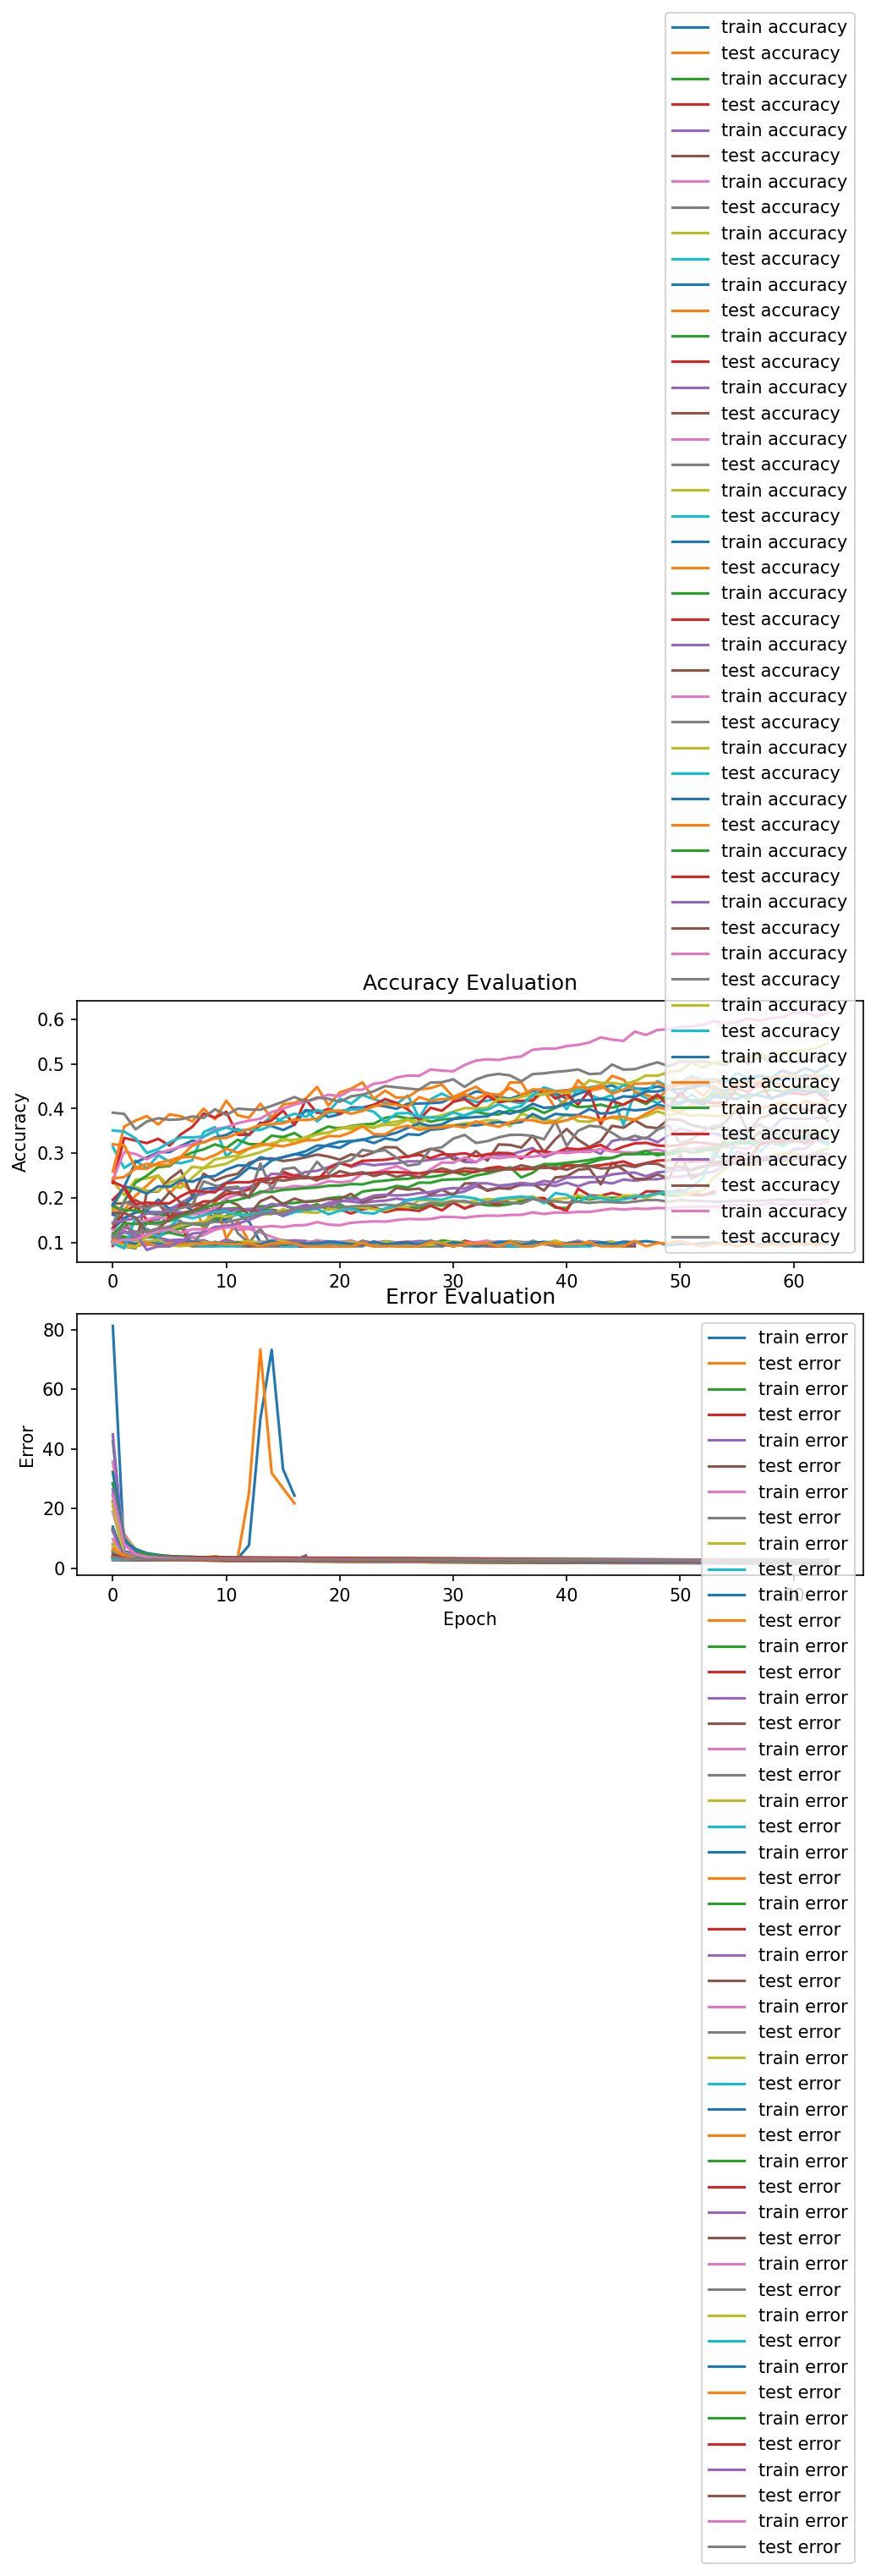

In [55]:
# create new figure object with 2 subplots
fig, ax = plt.subplots(2, figsize=(8,6), dpi=150)

for history in results:

    # 1. create accuracy subplot
    ax[0].plot(history.history["accuracy"], label="train accuracy")
    ax[0].plot(history.history["val_accuracy"], label="test accuracy")
    ax[0].set_ylabel("Accuracy")
    ax[0].legend(loc="lower right")
    ax[0].set_title("Accuracy Evaluation")

    # 2. create error subplot
    ax[1].plot(history.history["loss"], label="train error")
    ax[1].plot(history.history["val_loss"], label="test error")
    ax[1].set_xlabel("Epoch")
    ax[1].set_ylabel("Error")
    ax[1].legend(loc="upper right")
    ax[1].set_title("Error Evaluation")    

# display the two plots
plt.tight_layout()
plt.show()